<a href="https://colab.research.google.com/github/PraveenAnanth5451/BootCamp/blob/main/Day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**

In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [18]:

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['MedHouseVal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[X_train.shape[1]])
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01), loss='mse')

history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_test_scaled, y_test), verbose=1)



Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7264 - val_loss: 0.5290
Epoch 2/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3813 - val_loss: 0.5741
Epoch 3/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.2695 - val_loss: 0.5434
Epoch 4/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.2052 - val_loss: 0.5602
Epoch 5/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.1525 - val_loss: 0.5730
Epoch 6/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.1903 - val_loss: 0.5676
Epoch 7/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.2478 - val_loss: 0.5568
Epoch 8/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 10.4846 - val_loss: 0.5624
Epoch 9/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 13.3264 - val_loss: 0.5496
Epoch 10/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 10.8668 - val_loss: 0.5533
Epoch 11/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.0500 - val_loss: 0.5570
Epoch 12/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

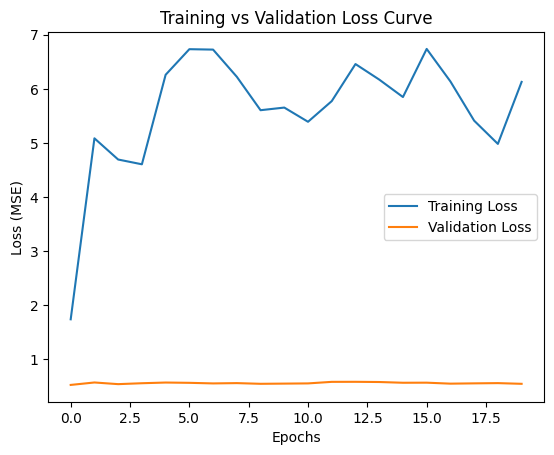

In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training vs Validation Loss Curve")
plt.show()


# **Task 2**

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

num_samples = 1000
image_size = 28 * 28
X = np.random.randint(0, 256, (num_samples, image_size)) / 255.0

y = np.random.randint(0, 10, num_samples)

y = to_categorical(y, num_classes=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(10, input_shape=(784,), activation="softmax")
])

model.compile(optimizer=RMSprop(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

predictions = model.predict(X_test[:5])



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0999 - loss: 2.4957 - val_accuracy: 0.1000 - val_loss: 2.5687
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1235 - loss: 2.3834 - val_accuracy: 0.0950 - val_loss: 2.3932
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1504 - loss: 2.2982 - val_accuracy: 0.0850 - val_loss: 2.4265
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1546 - loss: 2.2721 - val_accuracy: 0.0850 - val_loss: 2.4702
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1921 - loss: 2.2059 - val_accuracy: 0.1100 - val_loss: 2.4547
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2140 - loss: 2.1390 - val_accuracy: 0.0900 - val_loss: 2.4316
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2735 - loss: 2.0894 - val_accuracy: 0.1100 - val_loss: 2.4222
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2760 - loss: 2.0514 - val_accuracy: 0.1150 - val_loss: 2.4535
Ep

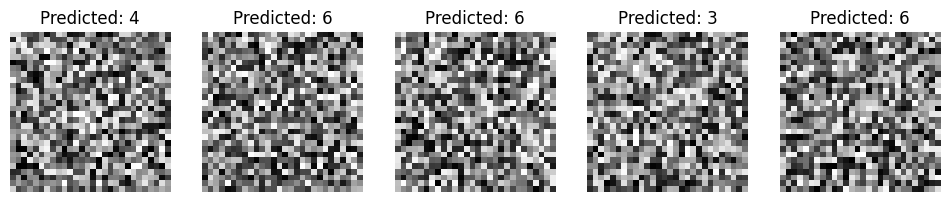

In [21]:
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Predicted: {np.argmax(predictions[i])}")
    ax.axis("off")

plt.show()


# **Task 3**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


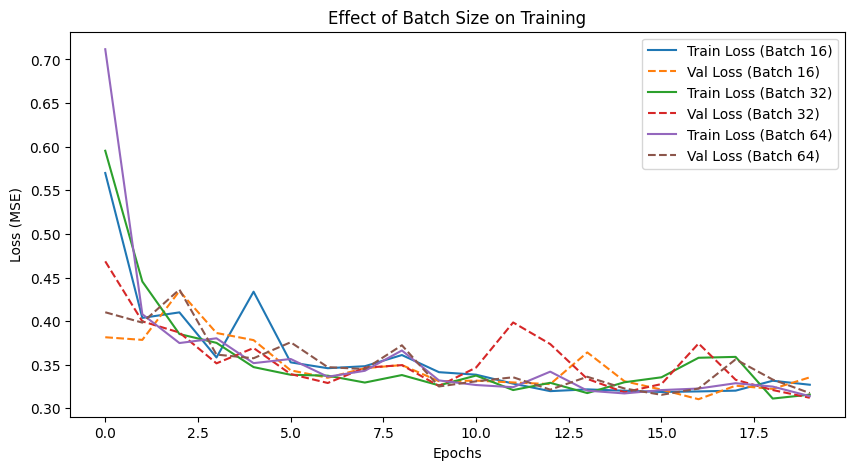

Batch Size 16: 1032 mini-batches per epoch
Batch Size 32: 516 mini-batches per epoch
Batch Size 64: 258 mini-batches per epoch


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()
X, y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

batch_sizes = [16, 32, 64]
history_results = {}

for batch_size in batch_sizes:
    model = create_model()
    history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
    history_results[batch_size] = history

plt.figure(figsize=(10, 5))
for batch_size, history in history_results.items():
    plt.plot(history.history['loss'], label=f'Train Loss (Batch {batch_size})')
    plt.plot(history.history['val_loss'], linestyle='dashed', label=f'Val Loss (Batch {batch_size})')

plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Effect of Batch Size on Training')
plt.legend()
plt.show()
num_train_samples = X_train.shape[0]
for batch_size in batch_sizes:
    mini_batches = np.ceil(num_train_samples / batch_size)
    print(f"Batch Size {batch_size}: {int(mini_batches)} mini-batches per epoch")


# **Task 5**

In [23]:
def create_model(hidden_units=None):
    model = Sequential()
    model.add(Dense(hidden_units, activation='relu', input_shape=(X_train.shape[1],))) if hidden_units else None
    model.add(Dense(1))
    model.compile(optimizer=RMSprop(learning_rate=0.5), loss='mse')
    return model

models = {
    "No Hidden Layer": create_model(),
    "Hidden Layer (2 units)": create_model(2),
    "Hidden Layer (4 units)": create_model(4)
}

history_results = {}
for name, model in models.items():
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=0)
    history_results[name] = history


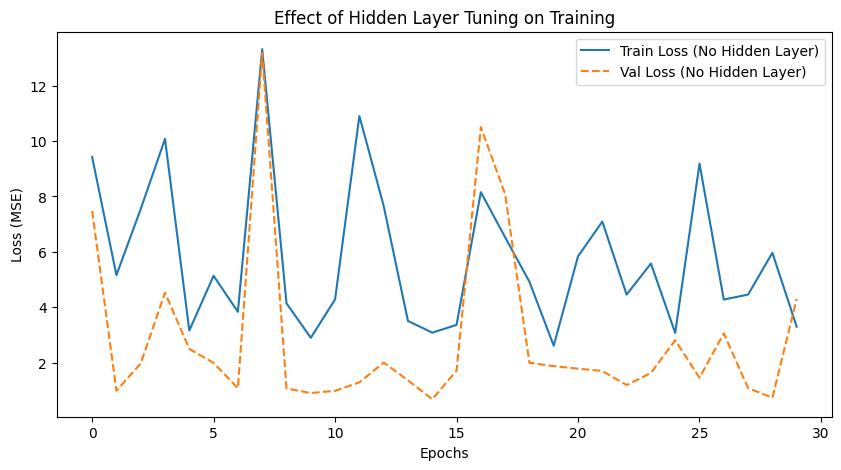

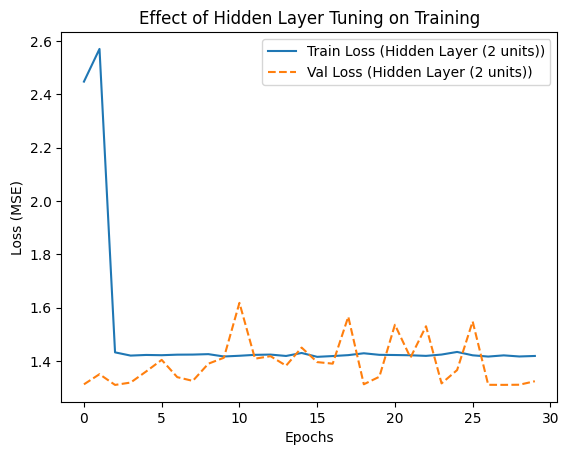

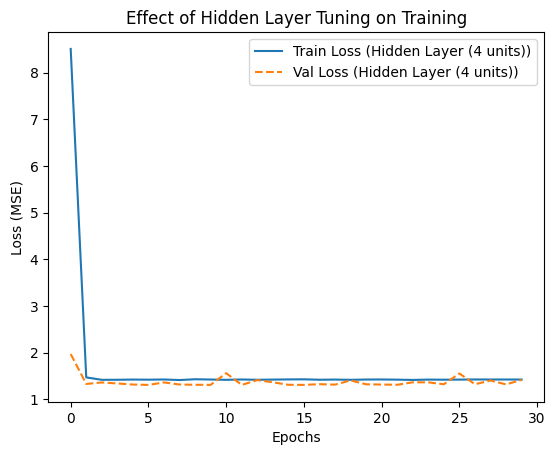

In [24]:

plt.figure(figsize=(10, 5))
for name, history in history_results.items():
    plt.plot(history.history['loss'], label=f'Train Loss ({name})')
    plt.plot(history.history['val_loss'], linestyle='dashed', label=f'Val Loss ({name})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title('Effect of Hidden Layer Tuning on Training')
    plt.legend()
    plt.show()

### **Task 4**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2376 - loss: 2.2931 - val_accuracy: 0.3151 - val_loss: 1.9501
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3067 - loss: 2.0760 - val_accuracy: 0.2184 - val_loss: 2.5492
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3159 - loss: 2.0455 - val_accuracy: 0.3173 - val_loss: 2.0254
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3245 - loss: 2.0408 - val_accuracy: 0.2732 - val_loss: 2.6085
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3310 - loss: 2.0194 - val_accuracy: 0.2925 - val_loss: 2.1083
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3335 - loss: 2.0123 - val_accuracy: 0.3166 - val_loss: 2.0125
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3400 - loss: 2.0022 - val_accuracy: 0.3185 - val_loss: 2.0811
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3415 - loss: 1.9896 - 

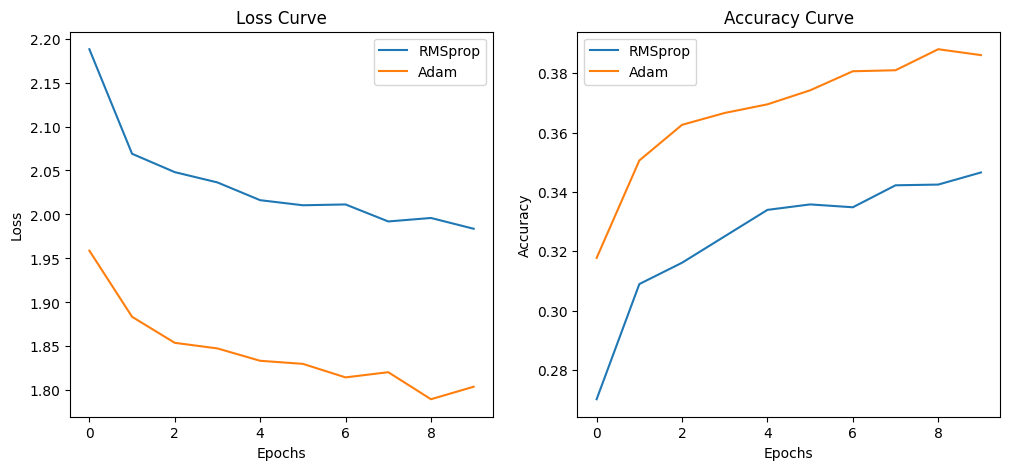

Final Accuracy - RMSprop: 0.3466, Adam: 0.3861


In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

def create_model():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(10, activation='softmax')
    ])
    return model


model_rmsprop = create_model()
model_rmsprop.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_rmsprop = model_rmsprop.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

model_adam = create_model()
model_adam.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(history_rmsprop.history['loss'], label='RMSprop')
axes[0].plot(history_adam.history['loss'], label='Adam')
axes[0].set_title('Loss Curve')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history_rmsprop.history['accuracy'], label='RMSprop')
axes[1].plot(history_adam.history['accuracy'], label='Adam')
axes[1].set_title('Accuracy Curve')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.show()


final_acc_rmsprop = history_rmsprop.history['accuracy'][-1]
final_acc_adam = history_adam.history['accuracy'][-1]
print(f"Final Accuracy - RMSprop: {final_acc_rmsprop:.4f}, Adam: {final_acc_adam:.4f}")